# ![](https://julyedu-img-public.oss-cn-beijing.aliyuncs.com/Public/img/index/logo.png)

# Pandas教程
### 2018七月在线 机器学习集训营第七期 [@Julyedu.com七月在线 ](http://www.julyedu.com)
by 褚则伟 zeweichu@gmail.com

## 目录
- Groupby和Aggregate
- 表格的匹配与拼接
- bikes项目

## Groupby and Aggregate
### 2018七月在线 机器学习集训营第七期 julyedu.com

举个栗子，假设我们现在有一张公司每个员工的收入流水。

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
salaries = pd.DataFrame({
    'Name': ['July', 'Zewei', 'Zewei', 'Han', 'July', 'July', 'Zewei', 'July'],
    'Year': [2016,2016,2016,2016,2017,2017,2017,2017],
    'Salary': [10000,2000,4000,5000,18000,25000,3000,4000],
    'Bonus': [3000,1000,1000,1200,4000,2300,500,1000]
})
print(salaries)

   Bonus   Name  Salary  Year
0   3000   July   10000  2016
1   1000  Zewei    2000  2016
2   1000  Zewei    4000  2016
3   1200    Han    5000  2016
4   4000   July   18000  2017
5   2300   July   25000  2017
6    500  Zewei    3000  2017
7   1000   July    4000  2017


接下来我给大家演示一下什么叫做Group By

In [2]:
group_by_name = salaries.groupby('Name')
group_by_name

groupby构造了一个GroupBy object

### groupby之后一般要做一些[aggregate](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.aggregate.html)操作

In [3]:
group_by_name.sum()


,Bonus,Salary,Year
Name,,,
Han,1200,5000,2016
July,10300,57000,8067
Zewei,2500,9000,6049


默认会排序，也可以选择不排序

In [4]:
salaries.groupby('Name', sort=False).sum()

,Bonus,Salary,Year
Name,,,
July,10300,57000,8067
Zewei,2500,9000,6049
Han,1200,5000,2016


也可以这么写

In [5]:
group_by_name.aggregate(sum)

,Bonus,Salary,Year
Name,,,
Han,1200,5000,2016
July,10300,57000,8067
Zewei,2500,9000,6049


group by的attributes

In [6]:
print(group_by_name.groups)
print(len(group_by_name))

{'Han': Int64Index([3], dtype='int64'), 'July': Int64Index([0, 4, 5, 7], dtype='int64'), 'Zewei': Int64Index([1, 2, 6], dtype='int64')}
3


可以用多个columns做group by

In [7]:
group_by_name_year = salaries.groupby(['Name', 'Year'])
group_by_name_year.sum()

Bonus  Salary
Name  Year               
Han   2016   1200    5000
July  2016   3000   10000
      2017   7300   47000
Zewei 2016   2000    6000
      2017    500    3000

除了sum之外，我们再来尝试一下size,mean,median 

In [8]:
group_by_name_year.size()

Name   Year
Han    2016    1
July   2016    1
       2017    3
Zewei  2016    2
       2017    1
dtype: int64

In [9]:
group_by_name.mean()

,Bonus,Salary,Year
Name,,,
Han,1200.000000,5000.0,2016.000000
July,2575.000000,14250.0,2016.750000
Zewei,833.333333,3000.0,2016.333333


In [10]:
group_by_name.median()

,Bonus,Salary,Year
Name,,,
Han,1200,5000,2016
July,2650,14000,2017
Zewei,1000,3000,2016


In [11]:
group_by_name.describe()

Bonus                                                                    \
      count         mean          std     min     25%     50%     75%     max   
Name                                                                            
Han     1.0  1200.000000          NaN  1200.0  1200.0  1200.0  1200.0  1200.0   
July    4.0  2575.000000  1260.621540  1000.0  1975.0  2650.0  3250.0  4000.0   
Zewei   3.0   833.333333   288.675135   500.0   750.0  1000.0  1000.0  1000.0   

      Salary            ...                      Year                        \
       count     mean   ...        75%      max count         mean      std   
Name                    ...                                                   
Han      1.0   5000.0   ...     5000.0   5000.0   1.0  2016.000000      NaN   
July     4.0  14250.0   ...    19750.0  25000.0   4.0  2016.750000  0.50000   
Zewei    3.0   3000.0   ...     3500.0   4000.0   3.0  2016.333333  0.57735   

                                                
          min      25%     50%     75%     max  
Name                                            
Han    2016.0  2016.00  2016.0  2016.0  2016.0  
July   2016.0  2016.75  2017.0  2017.0  2017.0  
Zewei  2016.0  2016.00  2016.0  2016.5  2017.0  

[3 rows x 24 columns]

### iterate GroupBy object

In [12]:
for name, group in group_by_name:
    print(name)
    print("=====")
    print(group)

Han
=====
   Bonus Name  Salary  Year
3   1200  Han    5000  2016
July
=====
   Bonus  Name  Salary  Year
0   3000  July   10000  2016
4   4000  July   18000  2017
5   2300  July   25000  2017
7   1000  July    4000  2017
Zewei
=====
   Bonus   Name  Salary  Year
1   1000  Zewei    2000  2016
2   1000  Zewei    4000  2016
6    500  Zewei    3000  2017


选择一个group

In [13]:
print(group_by_name.get_group("Zewei"))
type(group_by_name.get_group("Zewei"))

   Bonus  Salary  Year
1   1000    2000  2016
2   1000    4000  2016
6    500    3000  2017


pandas.core.frame.DataFrame

agg是aggregate的alias，可以替代使用

In [14]:
group_by_name.agg([np.sum, np.mean, np.std])

Bonus                           Salary                      Year  \
         sum         mean          std    sum   mean          std   sum   
Name                                                                      
Han     1200  1200.000000          NaN   5000   5000          NaN  2016   
July   10300  2575.000000  1260.621540  57000  14250  9178.779875  8067   
Zewei   2500   833.333333   288.675135   9000   3000  1000.000000  6049   

                             
              mean      std  
Name                         
Han    2016.000000      NaN  
July   2016.750000  0.50000  
Zewei  2016.333333  0.57735

对每一列可以采用不同的aggregate操作

In [15]:
group_by_name.agg({"Bonus": np.sum, "Salary": np.sum})

,Bonus,Salary
Name,,
Han,1200,5000
July,10300,57000
Zewei,2500,9000


In [16]:
group_by_name.agg({"Bonus": np.sum, "Salary": np.sum, "Year": (lambda x: list(x)[0])})

,Bonus,Salary,Year
Name,,,
Han,1200,5000,2016
July,10300,57000,2016
Zewei,2500,9000,2016


### [transform](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.transform.html)
transform会把group中的每一个record都按照同样的规则转化

In [17]:
import pandas as pd
nvda = pd.read_csv("./NVDA.csv", index_col=0, parse_dates=[0])
nvda.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,1.750000,1.953125,1.552083,1.640625,1.523430,67867200
1999-01-25,1.770833,1.833333,1.640625,1.812500,1.683028,12762000
1999-01-26,1.833333,1.869792,1.645833,1.671875,1.552448,8580000
1999-01-27,1.677083,1.718750,1.583333,1.666667,1.547611,6109200
1999-01-28,1.666667,1.677083,1.651042,1.661458,1.542776,5688000


In [18]:
nvda.index

DatetimeIndex(['1999-01-22', '1999-01-25', '1999-01-26', '1999-01-27',
               '1999-01-28', '1999-01-29', '1999-02-01', '1999-02-02',
               '1999-02-03', '1999-02-04',
               ...
               '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14', '2017-07-17', '2017-07-18',
               '2017-07-19', '2017-07-20'],
              dtype='datetime64[ns]', name='Date', length=4654, freq=None)

In [19]:
# nvda.groupby(nvda.index.year).mean()

In [20]:
zscore = lambda x:(x-x.mean())/x.std()


In [21]:
transformed = nvda.groupby(nvda.index.year).transform(zscore)
transformed.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,-0.340955,-0.088217,-0.579850,-0.510124,-0.510124,7.544438
1999-01-25,-0.305578,-0.283222,-0.424964,-0.224161,-0.224161,0.777210
1999-01-26,-0.199444,-0.223871,-0.415854,-0.458130,-0.458131,0.263637
1999-01-27,-0.464778,-0.469747,-0.525185,-0.466795,-0.466798,-0.039791
1999-01-28,-0.482465,-0.537575,-0.406741,-0.475462,-0.475461,-0.091517


用另一个function [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html#pandas.DataFrame.apply) 也可以起到同样的效果

In [22]:
transformed = nvda.groupby(nvda.index.year).apply(zscore)
transformed.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,-0.340955,-0.088217,-0.579850,-0.510124,-0.510124,7.544438
1999-01-25,-0.305578,-0.283222,-0.424964,-0.224161,-0.224161,0.777210
1999-01-26,-0.199444,-0.223871,-0.415854,-0.458130,-0.458131,0.263637
1999-01-27,-0.464778,-0.469747,-0.525185,-0.466795,-0.466798,-0.039791
1999-01-28,-0.482465,-0.537575,-0.406741,-0.475462,-0.475461,-0.091517


我们来尝试一下把这些数据画出来

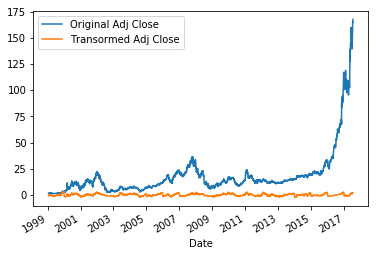

In [23]:
compare = pd.DataFrame({"Original Adj Close": nvda["Adj Close"], 
                        "Transormed Adj Close": transformed["Adj Close"]})
compare.plot()

In [24]:
price_range = lambda x: x.max() - x.min()
nvda.groupby(nvda.index.year).transform(price_range).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,2.552084,2.53125,2.510417,2.546875,2.364945,67375200.0
1999-01-25,2.552084,2.53125,2.510417,2.546875,2.364945,67375200.0
1999-01-26,2.552084,2.53125,2.510417,2.546875,2.364945,67375200.0
1999-01-27,2.552084,2.53125,2.510417,2.546875,2.364945,67375200.0
1999-01-28,2.552084,2.53125,2.510417,2.546875,2.364945,67375200.0


In [25]:
nvda.groupby(nvda.index.year).transform("max").head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,3.947917,3.953125,3.84375,3.911458,3.632052,67867200
1999-01-25,3.947917,3.953125,3.84375,3.911458,3.632052,67867200
1999-01-26,3.947917,3.953125,3.84375,3.911458,3.632052,67867200
1999-01-27,3.947917,3.953125,3.84375,3.911458,3.632052,67867200
1999-01-28,3.947917,3.953125,3.84375,3.911458,3.632052,67867200


### [filter](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.filter.html)

比如我们想要找出符合统计特征的一些内容，就像SQL里面的having, where语句

In [26]:
s = pd.Series([1,1,2,2,2,3,4,4,5])
s
s.groupby(s).groups
# s.groupby(s).filter(lambda x: x.sum() > 4)

{1: Int64Index([0, 1], dtype='int64'),
 2: Int64Index([2, 3, 4], dtype='int64'),
 3: Int64Index([5], dtype='int64'),
 4: Int64Index([6, 7], dtype='int64'),
 5: Int64Index([8], dtype='int64')}

In [27]:
df = pd.DataFrame({"A": np.arange(8), "B":list("aaabbbcc")})
df.groupby("B").filter(lambda x: len(x) > 2)

,A,B
0,0,a
1,1,a
2,2,a
3,3,b
4,4,b
5,5,b


我们来看看均价超过100的有哪些月份

In [28]:
nvda.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,1.750000,1.953125,1.552083,1.640625,1.523430,67867200
1999-01-25,1.770833,1.833333,1.640625,1.812500,1.683028,12762000
1999-01-26,1.833333,1.869792,1.645833,1.671875,1.552448,8580000
1999-01-27,1.677083,1.718750,1.583333,1.666667,1.547611,6109200
1999-01-28,1.666667,1.677083,1.651042,1.661458,1.542776,5688000


In [29]:
key_month = lambda x: x[0:7]

In [30]:
nvda.groupby([nvda.index.year, nvda.index.month]).filter(lambda x: x["Adj Close"].mean() > 50).head()

nvda.groupby([nvda.index.year, nvda.index.month,nvda.index.day]).filter(lambda x:  x["Adj Close"]>100).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-16,99.830002,100.699997,97.730003,100.410004,100.177933,27238200
2016-12-19,99.699997,102.449997,99.000000,101.629997,101.395111,18616400
2016-12-20,104.580002,106.129997,104.120003,105.169998,104.926933,21201400
2016-12-21,105.639999,105.949997,103.709999,105.830002,105.585411,14403400
2016-12-22,106.820000,108.870003,106.529999,107.110001,106.862442,17965300


### 小结： 
Group by: split-apply-combine
- 首先第一步是分离数据split，按照一定的规则把数据分成几类。
- 第二步是对每一部分数据都做一定的操作，这个操作可以是汇总操作aggregate，可以是一个变换transform，也可以是过滤数据filter。
- 最后一步就是把处理过的数据再合成一张DataFrame。


## 表格匹配与拼接
### 2018七月在线 机器学习集训营第七期 julyedu.com 
- concat
- append
- merge
- join

In [31]:
import pandas as pd
import numpy as np

In [32]:
df1 = pd.DataFrame({'apts': [55000, 60000],
                   'cars': [200000, 300000],},
                  index = ['Shanghai', 'Beijing']
                  )

print(df1)

           apts    cars
Shanghai  55000  200000
Beijing   60000  300000


In [33]:
df2 = pd.DataFrame({'cars': [150000, 120000],
                    'apts': [25000, 20000],
                   },
                  index = ['Hangzhou', 'Najing'])
print(df2)

           apts    cars
Hangzhou  25000  150000
Najing    20000  120000


In [34]:
df3 = pd.DataFrame({'apts': [30000, 10000],
                   'cars': [180000, 100000],'mar': [180000, 100000]},
                  index = ['Guangzhou', 'Chongqing'])
print(df3)


            apts    cars     mar
Guangzhou  30000  180000  180000
Chongqing  10000  100000  100000


### [concatenate](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html)

In [35]:
frames = [df1, df2, df3] 

result = pd.concat(   [df1,df2,df3] )
type(frames)
# print(result)

list

在concatenate的时候可以指定keys，这样可以给每一个部分加上一个Key。

以下的例子就构造了一个hierarchical index。

In [37]:
result2 = pd.concat(frames, keys=['x', 'y', 'z'])
print(result2)

              apts    cars       mar
x Shanghai   55000  200000       NaN
  Beijing    60000  300000       NaN
y Hangzhou   25000  150000       NaN
  Najing     20000  120000       NaN
z Guangzhou  30000  180000  180000.0
  Chongqing  10000  100000  100000.0


In [38]:
result2.loc["y","apts"]

Hangzhou    25000
Najing      20000
Name: apts, dtype: int64

In [39]:
df4 = pd.DataFrame({'salaries': [10000, 30000, 30000, 20000, 15000]},
                  index = ['Suzhou', 'Beijing', 'Shanghai', 'Guangzhou', 'Tianjin'])
print(df4)

           salaries
Suzhou        10000
Beijing       30000
Shanghai      30000
Guangzhou     20000
Tianjin       15000


In [40]:
result3 = pd.concat([result, df4], axis=1)
print(result3)

              apts      cars       mar  salaries
Beijing    60000.0  300000.0       NaN   30000.0
Chongqing  10000.0  100000.0  100000.0       NaN
Guangzhou  30000.0  180000.0  180000.0   20000.0
Hangzhou   25000.0  150000.0       NaN       NaN
Najing     20000.0  120000.0       NaN       NaN
Shanghai   55000.0  200000.0       NaN   30000.0
Suzhou         NaN       NaN       NaN   10000.0
Tianjin        NaN       NaN       NaN   15000.0


用inner可以去掉NaN,也就是说如果出现了不匹配的行就会被忽略

In [41]:
result3 = pd.concat([result, df4], axis=1, join='inner')
print(result3)

            apts    cars       mar  salaries
Shanghai   55000  200000       NaN     30000
Beijing    60000  300000       NaN     30000
Guangzhou  30000  180000  180000.0     20000


#### 用[append](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html)来做concatenation

In [43]:
print(df1.append(df2))

           apts    cars
Shanghai  55000  200000
Beijing   60000  300000
Hangzhou  25000  150000
Najing    20000  120000


In [44]:
df1.join

<bound method DataFrame.join of            apts    cars
Shanghai  55000  200000
Beijing   60000  300000>

In [45]:
print(df1.append(df4))

              apts      cars  salaries
Shanghai   55000.0  200000.0       NaN
Beijing    60000.0  300000.0       NaN
Suzhou         NaN       NaN   10000.0
Beijing        NaN       NaN   30000.0
Shanghai       NaN       NaN   30000.0
Guangzhou      NaN       NaN   20000.0
Tianjin        NaN       NaN   15000.0


Series和DataFrame还可以被一起concatenate，这时候Series会先被转成DataFrame然后做Join，因为Series本来就是一个只有一维的DataFrame对吧。

In [46]:
s1 = pd.Series([60, 50], index=['Shanghai', 'Beijing'], name='meal')
print(s1)

Shanghai    60
Beijing     50
Name: meal, dtype: int64


In [47]:
print(df1)

           apts    cars
Shanghai  55000  200000
Beijing   60000  300000


In [48]:
print(pd.concat([df1, s1], axis=1))

           apts    cars  meal
Shanghai  55000  200000    60
Beijing   60000  300000    50


下面讲如何append一个row到DataFrame里。

In [49]:
s2 = pd.Series([18000, 12000], index=['apts', 'cars'], name='Xiamen') #注意这里的name是必须要有的，因为要用作Index。
print(s2)

apts    18000
cars    12000
Name: Xiamen, dtype: int64


In [50]:
print(df1.append(s2))

           apts    cars
Shanghai  55000  200000
Beijing   60000  300000
Xiamen    18000   12000


### Merge(Join)
### 2018七月在线 机器学习集训营 julyedu.com 

In [51]:
df1 = pd.DataFrame({'apts': [55000, 60000, 58000],
                   'cars': [200000, 300000,250000],
                  'city': ['Shanghai', 'Beijing','Shenzhen']})
print(df1)

    apts    cars      city
0  55000  200000  Shanghai
1  60000  300000   Beijing
2  58000  250000  Shenzhen


In [52]:
df4 = pd.DataFrame({'salaries': [10000, 30000, 30000, 20000, 15000],
                  'city': ['Suzhou', 'Beijing', 'Shanghai', 'Guangzhou', 'Tianjin']})
print(df4)

        city  salaries
0     Suzhou     10000
1    Beijing     30000
2   Shanghai     30000
3  Guangzhou     20000
4    Tianjin     15000


In [53]:
result = pd.merge(df1, df4, on='city')
result

,apts,cars,city,salaries
0,55000,200000,Shanghai,30000
1,60000,300000,Beijing,30000


In [54]:
result = pd.merge(df1, df4)
result

,apts,cars,city,salaries
0,55000,200000,Shanghai,30000
1,60000,300000,Beijing,30000


In [55]:
result = pd.merge(df1, df4, on='city', how='outer')
print(result)

      apts      cars       city  salaries
0  55000.0  200000.0   Shanghai   30000.0
1  60000.0  300000.0    Beijing   30000.0
2  58000.0  250000.0   Shenzhen       NaN
3      NaN       NaN     Suzhou   10000.0
4      NaN       NaN  Guangzhou   20000.0
5      NaN       NaN    Tianjin   15000.0


In [56]:
result = pd.merge(df1, df4, on='city', how='right')
print(result)

      apts      cars       city  salaries
0  55000.0  200000.0   Shanghai     30000
1  60000.0  300000.0    Beijing     30000
2      NaN       NaN     Suzhou     10000
3      NaN       NaN  Guangzhou     20000
4      NaN       NaN    Tianjin     15000


In [57]:
result = pd.merge(df1, df4, on='city', how='left')
print(result)

    apts    cars      city  salaries
0  55000  200000  Shanghai   30000.0
1  60000  300000   Beijing   30000.0
2  58000  250000  Shenzhen       NaN


其实用concat也可以做同样的事情

In [58]:
pd.concat([df1.set_index("city"), df4.set_index('city')], sort=False, axis=1, join="inner")



TypeError: concat() got an unexpected keyword argument 'sort'

#### join on index

In [59]:
df1 = pd.DataFrame({'apts': [55000, 60000, 58000],
                   'cars': [200000, 300000,250000]},
                  index=['Shanghai', 'Beijing','Shenzhen'])
print(df1)

           apts    cars
Shanghai  55000  200000
Beijing   60000  300000
Shenzhen  58000  250000


In [60]:
df4 = pd.DataFrame({'salaries': [10000, 30000, 30000, 20000, 15000]},
                  index=['Suzhou', 'Beijing', 'Shanghai', 'Guangzhou', 'Tianjin'])
print(df4)

           salaries
Suzhou        10000
Beijing       30000
Shanghai      30000
Guangzhou     20000
Tianjin       15000


In [61]:
print(df1.join(df4))

           apts    cars  salaries
Shanghai  55000  200000   30000.0
Beijing   60000  300000   30000.0
Shenzhen  58000  250000       NaN


也可以用merge来写

In [62]:
pd.merge(df1, df4, left_index=True, right_index=True, how='outer')

,apts,cars,salaries
Beijing,60000.0,300000.0,30000.0
Guangzhou,NaN,NaN,20000.0
Shanghai,55000.0,200000.0,30000.0
Shenzhen,58000.0,250000.0,NaN
Suzhou,NaN,NaN,10000.0
Tianjin,NaN,NaN,15000.0


In [64]:
pd.concat([df1, df4], axis=1)

,apts,cars,salaries
Beijing,60000.0,300000.0,30000.0
Guangzhou,NaN,NaN,20000.0
Shanghai,55000.0,200000.0,30000.0
Shenzhen,58000.0,250000.0,NaN
Suzhou,NaN,NaN,10000.0
Tianjin,NaN,NaN,15000.0


#### 下面我们来尝试一个稍微复杂一点的表格汇总+拼接项目


以下表格记录了用户对电影的评分

In [66]:
ratings = pd.read_csv("./ratings_small.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [67]:
ratings.shape
cout = ratings.groupby("movieId").agg({ "timestamp": "count"})
cout

,timestamp
movieId,
1,247
2,107
3,59
4,13
5,56
6,104
7,53
8,5
9,20


我们来计算一下每部电影的平均分，以及有多少人打分。

In [68]:
ratings_mean = ratings.groupby("movieId").agg({"rating": np.mean, "timestamp": "count"}).rename(columns={"timestamp": "count"})
ratings_mean.head()

,rating,count
movieId,,
1,3.872470,247
2,3.401869,107
3,3.161017,59
4,2.384615,13
5,3.267857,56


In [69]:
ratings_mean.shape

(9066, 2)

下一张表格是每部电影的具体信息

In [71]:
meta = pd.read_csv("./movies_metadata.csv")
meta.head()

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [72]:
meta.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

我们只需要电影的ID和名字

In [73]:
meta[["id", "title"]].head()

,id,title
0,862,Toy Story
1,8844,Jumanji
2,15602,Grumpier Old Men
3,31357,Waiting to Exhale
4,11862,Father of the Bride Part II


In [74]:
movie_titles = meta[["id", "title"]]
movie_titles.head()

,id,title
0,862,Toy Story
1,8844,Jumanji
2,15602,Grumpier Old Men
3,31357,Waiting to Exhale
4,11862,Father of the Bride Part II


In [75]:
print(ratings_mean.shape)
print(movie_titles.shape)

(9066, 2)
(45466, 2)


在处理实际数据的时候，经常容易碰到脏数据，而怎么样处理脏数据其实就需要根据实际情况来决定了。

In [76]:
for i in range(movie_titles.shape[0]):
    try:
        int(movie_titles.loc[i, "id"])
    except ValueError:
        movie_titles.loc[i, "id"] = 99999999999999

/usr/lib/python3/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [77]:
movie_titles.loc[:, "id"] = pd.to_numeric(movie_titles.loc[:, "id"])

/usr/lib/python3/dist-packages/pandas/core/indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


现在把电影的评分和电影名称表格拼接起来。

In [78]:
movie_name_ratings = pd.merge(ratings_mean, movie_titles, how="inner", left_index=True, right_on="id")
movie_name_ratings.head()

,rating,count,id,title
4342,3.401869,107,2,Ariel
12947,3.161017,59,3,Shadows in Paradise
17,3.267857,56,5,Four Rooms
474,3.884615,104,6,Judgment Night
256,3.689024,82,11,Star Wars


In [79]:
movie_name_ratings.shape

(2831, 4)

In [80]:

movie_name_ratings.sort_values(by=["count", "rating"], ascending=False).head(5)

,rating,count,id,title
6388,4.256173,324,296,Terminator 3: Rise of the Machines
4020,4.487138,311,318,The Million Dollar Hotel
3382,4.138158,304,593,Solaris
938,4.221649,291,260,The 39 Steps
5004,3.706204,274,480,Monsoon Wedding


## 项目时间
### 2018七月在线 机器学习集训营第七期 julyedu.com

处理实际数据的时候，很多时候时间都花在处理脏数据上。

我们来尝试一个例子，读取一些自行车的数据。

bikes.csv记录了Montreal自行车路线的数据，具体有7条路线，分别记录了每条自行车路线每天有多少人经过。

In [81]:
# bikes = pd.read_csv("data/bikes.csv")

怎么报错了？不要慌，我们Google一下这个错误是什么意思。

In [83]:
bikes = pd.read_csv("./bikes.csv", encoding="latin-1")
bikes.head()

,Date;Berri 1;Brébeuf (données non disponibles);Côte-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (données non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;
3,04/01/2012;144;;1;116;318;111;8;61;
4,05/01/2012;197;;2;124;330;97;13;95;


这个数据读进来都揉成一团了，为什么呢？因为这个数据的格式并不是用逗号分隔的，而是用分号分隔的。所以我们要声明一下sep

In [85]:
bikes = pd.read_csv('./bikes.csv', sep=';', parse_dates=['Date'], \
                    encoding='latin-1', dayfirst=True, index_col='Date')
bikes.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


这样读进来的数据就正常了，还有一个问题，就是数据看起来有好多的NaN。dropna可以帮我们删掉一些带NA的行或者列。

In [86]:
bikes.shape

(310, 9)

In [87]:
bikes.dropna()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,


In [88]:
bikes.dropna(how = "all").head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


In [89]:
bikes.dropna(how = "all").shape

(310, 9)

dropna默认是删掉行，如果想删掉一列，就要声明一下axis参数

In [90]:
bikes.dropna(how="all", axis=1).head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
Date,,,,,,,
2012-01-01,35,0,38,51,26,10,16
2012-01-02,83,1,68,153,53,6,43
2012-01-03,135,2,104,248,89,3,58
2012-01-04,144,1,116,318,111,8,61
2012-01-05,197,2,124,330,97,13,95


In [91]:
bikes.dropna(how="all", axis=1).shape

(310, 7)

对于缺失的数据，我们未必要直接删除，可以考虑用[fillna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)把这一行的平均数填上。

In [92]:
bikes.T.fillna(bikes.T.mean(0)).T.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35.0,25.142857,0.0,38.0,51.0,26.0,10.0,16.0,25.142857
2012-01-02,83.0,58.142857,1.0,68.0,153.0,53.0,6.0,43.0,58.142857
2012-01-03,135.0,91.285714,2.0,104.0,248.0,89.0,3.0,58.0,91.285714
2012-01-04,144.0,108.428571,1.0,116.0,318.0,111.0,8.0,61.0,108.428571
2012-01-05,197.0,122.571429,2.0,124.0,330.0,97.0,13.0,95.0,122.571429


In [93]:
berri_bikes = bikes[["Berri 1"]]
berri_bikes.head()

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


In [94]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)

In [95]:
berri_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=310)

In [96]:
berri_bikes.loc[:, "weekday"] = berri_bikes.index.weekday
berri_bikes.head()

/usr/lib/python3/dist-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/lib/python3/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


In [97]:
weekday_counts = berri_bikes.groupby("weekday").mean()
weekday_counts

,Berri 1
weekday,
0,2984.400000
1,3075.113636
2,3476.636364
3,3639.340909
4,3222.068182
5,2308.590909
6,2206.888889


In [98]:
weekday_counts.index = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_counts

,Berri 1
Monday,2984.400000
Tuesday,3075.113636
Wednesday,3476.636364
Thursday,3639.340909
Friday,3222.068182
Saturday,2308.590909
Sunday,2206.888889


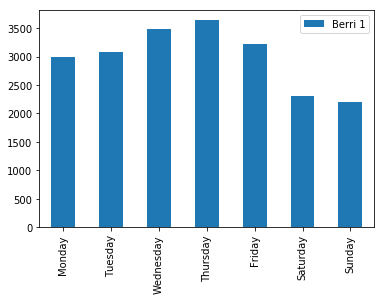

In [99]:
%matplotlib inline
weekday_counts.plot(kind="bar")

In [100]:
bikes_avg = bikes.mean(axis=1).to_frame()
bikes_avg
bikes_avg.columns = ["bikes_avg"]
bikes_avg.head()

,bikes_avg
Date,
2012-01-01,25.142857
2012-01-02,58.142857
2012-01-03,91.285714
2012-01-04,108.428571
2012-01-05,122.571429


In [101]:
bikes_avg.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=310)

In [102]:
bikes_avg.loc[:, "weekday"] = bikes_avg.index.weekday
bikes_avg.head()

,bikes_avg,weekday
Date,,
2012-01-01,25.142857,6
2012-01-02,58.142857,0
2012-01-03,91.285714,1
2012-01-04,108.428571,2
2012-01-05,122.571429,3


最后我们再来求平均，看看一周当中每天总共有多少自行车通过

In [103]:
weekday_avg = bikes_avg.groupby("weekday").mean()
weekday_avg.index = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_avg

,bikes_avg
Monday,2269.723810
Tuesday,2268.123377
Wednesday,2564.032468
Thursday,2691.782468
Friday,2398.610390
Saturday,1677.600649
Sunday,1644.593651


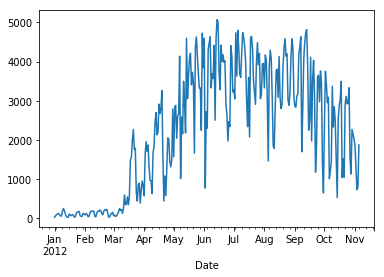

In [104]:
bikes_avg["bikes_avg"].plot()

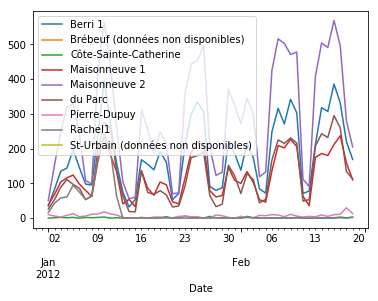

In [105]:
bikes.iloc[:50, :].plot()

## 项目时间
### 2018七月在线 机器学习集训营 julyedu.com 
下面我们通过一个做股票分析的小项目带着大家熟悉一下pandas表格拼接和处理的操作。可参考以下博客文章。

[stock analysis](https://ntguardian.wordpress.com/2016/09/19/introduction-stock-market-data-python-1/)

In [107]:
goog = pd.read_csv("./GOOG.csv", index_col=0, parse_dates=["Date"])
goog.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14', '2017-07-17', '2017-07-18',
               '2017-07-19', '2017-07-20'],
              dtype='datetime64[ns]', name='Date', length=3253, freq=None)

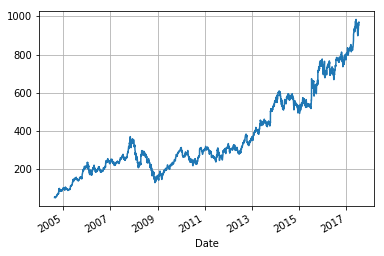

In [108]:
goog["Adj Close"].plot(grid = True)

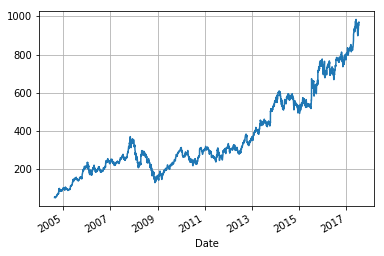

In [109]:
goog["Close"].plot(grid = True)

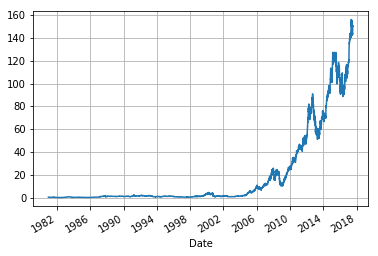

In [111]:
aapl = pd.read_csv("./AAPL.csv", index_col=0, parse_dates=[0])
aapl["Adj Close"].plot(grid=True)

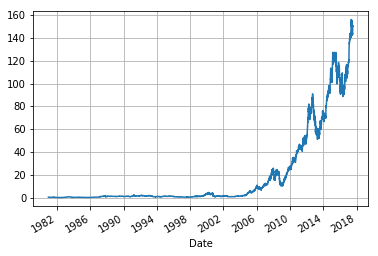

In [112]:
aapl["Adj Close"].plot(grid=True)

In [114]:
msft = pd.read_csv("./MSFT.csv", index_col=0, parse_dates=[0])

尝试一下把三张表格拼接到一起

In [115]:
stocks = pd.concat([aapl["Adj Close"], msft["Adj Close"], goog["Adj Close"]], axis=1)
stocks.columns = ["AAPL", "MSFT", "GOOG"]
stocks.head()

,AAPL,MSFT,GOOG
Date,,,
1980-12-12,0.423252,NaN,NaN
1980-12-15,0.401170,NaN,NaN
1980-12-16,0.371726,NaN,NaN
1980-12-17,0.380927,NaN,NaN
1980-12-18,0.391969,NaN,NaN


In [116]:
stocks = pd.DataFrame({"AAPL": aapl["Adj Close"].bfill(),
                      "MSFT": msft["Adj Close"].bfill(),
                      "GOOG": goog["Adj Close"].bfill()})

In [117]:
stocks.head()

,AAPL,GOOG,MSFT
Date,,,
1980-12-12,0.423252,NaN,NaN
1980-12-15,0.401170,NaN,NaN
1980-12-16,0.371726,NaN,NaN
1980-12-17,0.380927,NaN,NaN
1980-12-18,0.391969,NaN,NaN


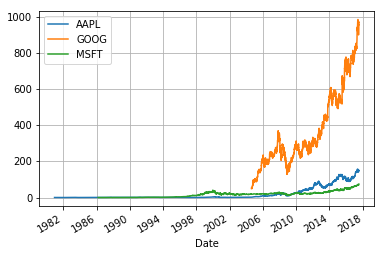

In [118]:
# stocks = pd.to_numeric(stocks)
stocks.plot(grid=True)

In [119]:
valid_stocks = stocks[stocks.index >= stocks["GOOG"].first_valid_index()]

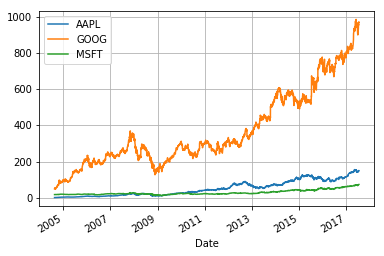

In [120]:
valid_stocks.plot(grid=True)

AAPL    float64
GOOG    float64
MSFT    float64
dtype: object

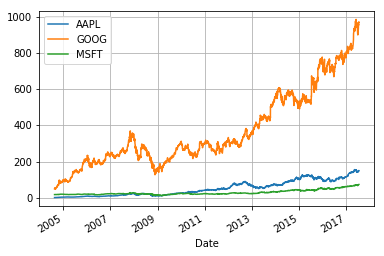

In [121]:
valid_stocks.plot(grid=True)
valid_stocks.dtypes

如果我们想要画出月K线呢？

In [ ]:
monthly_stocks = valid_stocks.resample("M").last()
monthly_stocks.plot()